In [ ]:
# default_exp models.dls

# DataLoaders

> Deep Learning DataLoaders with Fastai/Pytorch.

In [ ]:
# hide
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
# export
from steel_segmentation.core import *
from steel_segmentation.data import *
from steel_segmentation.preprocessing import *

import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    from fastai.vision.all import *
    from fastai.data.all import *
    import fastai
from fastcore.foundation import *

# list of imgid with patterns
patterns_imgid_list = ['000789191.jpg', '00d7ae946.jpg', '01b237ab8.jpg', '01d590c5f.jpg',
                       '01e501f99.jpg', '023353d24.jpg', '031614d60.jpg', '03395a3da.jpg',
                       '047681252.jpg', '063b5dcbe.jpg', '06a86ee90.jpg', '07cb85a8d.jpg',
                       '07e8fca73.jpg', '08e21ba66.jpg', '092c1f666.jpg', '0a3bbea4d.jpg',
                       '0a46cc4bf.jpg', '0a5a82b86.jpg', '0a65bd8d4.jpg', '0a76ac9b8.jpg',
                       '0b3a0fabe.jpg', '0b50b417a.jpg', '0d0c21687.jpg', '0d22de6d4.jpg',
                       '0e09ff3bd.jpg', '0e3ade070.jpg', '0e479a15f.jpg', '0ec90edd8.jpg',
                       '0ef4bff49.jpg', '0faa71251.jpg', '0fab4b372.jpg', '0fac62a3e.jpg',
                       '100de36e9.jpg', '109fbcecf.jpg', '110e63bfa.jpg', '11872c662.jpg',
                       '11b60701f.jpg', '1205a8e2b.jpg', '12e5fd049.jpg', '12ef6188f.jpg',
                       '13cf44f8d.jpg', '140c6ef91.jpg', '14b5ab5a6.jpg', '174528b1d.jpg',
                       '175a25522.jpg', '175d95f92.jpg', '17a2d22f7.jpg', '17e6e4b30.jpg',
                       '17e7e1e08.jpg', '18262cbbb.jpg', '1841b3825.jpg', '1844b698a.jpg',
                       '184eb988e.jpg', '18af1ceb1.jpg', '18cc39190.jpg', '18cc78e81.jpg',
                       '18dfcd9ae.jpg', '18e2f6396.jpg', '193732cc8.jpg', '194e207f7.jpg',
                       '1a20228f6.jpg', '1a4ac4d43.jpg', '1a759ef19.jpg', '1aa7e1c47.jpg',
                       '1bb316ba4.jpg', '1bec34f9a.jpg', '1c2b72b46.jpg', '1d4b011c7.jpg',
                       '1d849ef03.jpg', '1dfd53dbb.jpg', '1e28fa5c3.jpg', '1e351863b.jpg',
                       '1ee9359c6.jpg', '1f151ee84.jpg', '1f2c14ca8.jpg', '1f9f854f3.jpg',
                       '1fcabeee5.jpg', '1fccd2eed.jpg', '1fd758653.jpg', '2059da9eb.jpg',
                       '219cd030a.jpg', '21d2b3168.jpg', '220129a97.jpg', '223e550cc.jpg',
                       '22757e90a.jpg', '22d94f944.jpg', '230ce1940.jpg', '2338ed2ae.jpg',
                       '2441b5d16.jpg', '249b7d301.jpg', '255a79790.jpg', '25bc3a693.jpg',
                       '26103f6a4.jpg', '26364af58.jpg', '26bcc93ff.jpg', '26e034336.jpg',
                       '277c7771d.jpg', '27f331654.jpg', '2854206dc.jpg', '295e39efa.jpg',
                       '2995f68a3.jpg', '29c3aaed7.jpg', '2a8096ad1.jpg', '2ab6eed56.jpg',
                       '2acd6db1e.jpg', '2b06b596f.jpg', '2c14af3b2.jpg', '2c213b074.jpg',
                       '2c67e770e.jpg', '2c8a82986.jpg', '2cf9289c4.jpg', '2d3c47b87.jpg',
                       '2d7a69b1f.jpg', '2dd1084fb.jpg', '2e0ef2076.jpg', '2e4308ede.jpg',
                       '2eb20e316.jpg', '2f2afbcc4.jpg', '2f473296b.jpg', '2fdafaf26.jpg',
                       '303613d84.jpg', '3046d724c.jpg', '306415665.jpg', '30979541d.jpg',
                       '329153502.jpg', '33691f767.jpg', '33a835109.jpg', '33e7b3469.jpg',
                       '341952a36.jpg', '348bfe68e.jpg', '3503a107c.jpg', '3573170d7.jpg',
                       '358e87349.jpg', '35d245aa8.jpg', '3615f1d69.jpg', '364e66340.jpg',
                       '366248602.jpg', '36a630d2a.jpg', '374a718ca.jpg', '37f6b9fe0.jpg',
                       '383793f65.jpg', '386a3b711.jpg', '386e34822.jpg', '387deae63.jpg',
                       '3887e646f.jpg', '38fc3c6f5.jpg', '396851647.jpg', '3977fffae.jpg',
                       '3996e2b5c.jpg', '39ac947b9.jpg', '3c0a7290f.jpg', '3c0b48018.jpg',
                       '3c6c3dbf1.jpg', '3c9ce987e.jpg', '3d577cf47.jpg', '3e7d00bf4.jpg',
                       '3f4cb099f.jpg', '3fdc767bf.jpg', '3feed5ab3.jpg', '404a89d7b.jpg',
                       '405f55b63.jpg', '41ddf91f7.jpg', '422003263.jpg', '4281f5d71.jpg',
                       '42e6b0f02.jpg', '44c7ae7bc.jpg', '44eaa8416.jpg', '453cb7bd8.jpg',
                       '457055016.jpg', '45e2d90b0.jpg', '45f984c71.jpg', '467ba206c.jpg',
                       '4687087d5.jpg', '47a0ed2bb.jpg', '47f4eb2de.jpg', '482e2e173.jpg',
                       '4956b306e.jpg', '4a4c18443.jpg', '4a6a40fa0.jpg', '4c3e41efe.jpg',
                       '4c40deb9a.jpg', '4c5617af0.jpg', '4d1aa2558.jpg', '4d39da061.jpg',
                       '4d68a7a1a.jpg', '4d8fac53d.jpg', '4d9fadf79.jpg', '4e15a5ea4.jpg',
                       '4e56a3dfc.jpg', '4ed62a0c0.jpg', '5047b4ba0.jpg', '508637e33.jpg',
                       '50c83fcaf.jpg', '5122366c6.jpg', '512ac9a49.jpg', '5226a20da.jpg',
                       '522ade1d3.jpg', '52b3b763f.jpg', '536f5bd1b.jpg', '54d5658e2.jpg',
                       '55728df3e.jpg', '562e2274c.jpg', '57258d636.jpg', '578ba56db.jpg',
                       '58499efc0.jpg', '5852d571b.jpg', '585f34f11.jpg', '58d6e5853.jpg',
                       '59664a874.jpg', '59ae6ad57.jpg', '59ae6de0b.jpg', '59f53bdb4.jpg',
                       '5a4af1a28.jpg', '5b3f3abe1.jpg', '5b4d883bf.jpg', '5ba431673.jpg',
                       '5bbb8cea1.jpg', '5c5a0ce34.jpg', '5cd2a9b53.jpg', '5d070ece7.jpg',
                       '5d34abcf4.jpg', '5ee800985.jpg', '5eeb58b97.jpg', '5f507f470.jpg',
                       '5f7e6cfdd.jpg', '6006371fc.jpg', '602a29dac.jpg', '6100ef061.jpg',
                       '614054f86.jpg', '617b8af67.jpg', '6181243e8.jpg', '6195c3cf0.jpg',
                       '61a2a3de3.jpg', '625c1af1f.jpg', '62a4c01b4.jpg', '62cf0b008.jpg',
                       '635c14be4.jpg', '64945c8c0.jpg', '64b0f37d7.jpg', '64b4c2791.jpg',
                       '657f2e15d.jpg', '65829e956.jpg', '65e2c4248.jpg', '661f3fe2b.jpg',
                       '665a8347a.jpg', '6724b9623.jpg', '682bdb9ca.jpg', '689491df4.jpg',
                       '68db9ad2d.jpg', '692b061c7.jpg', '6951354ff.jpg', '6978ec041.jpg',
                       '69b01f980.jpg', '69e3729fa.jpg', '6a09f4e4d.jpg', '6a8fbd4d1.jpg',
                       '6b26c1a9a.jpg', '6b6497cef.jpg', '6b665ad9f.jpg', '6c2585cf5.jpg',
                       '6ce483b03.jpg', '6ee81c40c.jpg', '6f0b6b59d.jpg', '6f19759f3.jpg',
                       '6fc668134.jpg', '7018e55f6.jpg', '710a38fab.jpg', '719061f8f.jpg',
                       '71b4288a5.jpg', '725d2e3da.jpg', '72682f66a.jpg', '7280c5e8d.jpg',
                       '7303ad5de.jpg', '7311d533d.jpg', '74ec8e2a1.jpg', '75c290dc0.jpg',
                       '761bdd88d.jpg', '764b4998b.jpg', '767755f3e.jpg', '7689b3227.jpg',
                       '773d61c10.jpg', '774f60117.jpg', '775bddbe7.jpg', '77a034db9.jpg',
                       '77d12abf0.jpg', '77dcba76f.jpg', '7868009d5.jpg', '788d11d35.jpg',
                       '793b08f01.jpg', '794a1f622.jpg', '79631c4e2.jpg', '79b4672b2.jpg',
                       '79b696401.jpg', '79f893f41.jpg', '7a835f759.jpg', '7b0b85b1d.jpg',
                       '7b4be079e.jpg', '7b52c0c6c.jpg', '7bb17c5f2.jpg', '7c5b3e03a.jpg',
                       '7c67a4611.jpg', '7cf827fc8.jpg', '7d4f862bf.jpg', '7db619168.jpg',
                       '7e2607582.jpg', '7e5c4b68d.jpg', '7ed538f87.jpg', '7f98f8f6c.jpg',
                       '802e8e4af.jpg', '8088f6b20.jpg', '80adf1a29.jpg', '811ed7a89.jpg',
                       '813be2643.jpg', '818614bea.jpg', '822aa8de8.jpg', '82ac8152a.jpg',
                       '8366a9a39.jpg', '8369f54aa.jpg', '83886dd5d.jpg', '85f750ca7.jpg',
                       '86f7a8b1d.jpg', '870de47b5.jpg', '884bf0558.jpg', '888263bf8.jpg',
                       '88b4105df.jpg', '88e6e44c1.jpg', '89c28225d.jpg', '8abee6870.jpg',
                       '8b299d9aa.jpg', '8bba1760b.jpg', '8bcf692a1.jpg', '8bf89777a.jpg',
                       '8bf8b9c33.jpg', '8c1825273.jpg', '8c7f9bc51.jpg', '8cceaf17c.jpg',
                       '8cd4a4a89.jpg', '8dd5b0f4d.jpg', '90047b73a.jpg', '901b85944.jpg',
                       '90b0043d9.jpg', '90b45e095.jpg', '90ed657c6.jpg', '9165be267.jpg',
                       '916d55994.jpg', '918a753e9.jpg', '91f2a3209.jpg', '9207ba274.jpg',
                       '92a84eb98.jpg', '930a3dc72.jpg', '94353a55a.jpg', '945200e71.jpg',
                       '94a5728a6.jpg', '94f95f5ec.jpg', '955965785.jpg', '95e38ad8e.jpg',
                       '96588d8eb.jpg', '96a82938c.jpg', '9719f1eba.jpg', '9766ccf1b.jpg',
                       '976a099e9.jpg', '998d686d8.jpg', '9a08c2783.jpg', '9a2523ce9.jpg',
                       '9a81a8056.jpg', '9aa44fa54.jpg', '9bac5408a.jpg', '9c05fdb53.jpg',
                       '9ce34209d.jpg', '9d742f4b4.jpg', '9db428c2d.jpg', '9e26c5b98.jpg',
                       '9e3aec0e0.jpg', '9edb5294f.jpg', '9efc711f5.jpg', '9f38e4503.jpg',
                       '9f88a11c0.jpg', '9f8f010ab.jpg', '9ffe5113f.jpg', 'a09855d99.jpg',
                       'a0b425852.jpg', 'a130c38e0.jpg', 'a1547cdfd.jpg', 'a27d1d567.jpg',
                       'a2ff5d12e.jpg', 'a3339fb1b.jpg', 'a36c9a89e.jpg', 'a3fe8d17b.jpg',
                       'a4a007ea2.jpg', 'a4dc8cd6c.jpg', 'a52aa70f7.jpg', 'a59a92ca2.jpg',
                       'a61727238.jpg', 'a6f761c3f.jpg', 'a73cf6a39.jpg', 'a76da9e56.jpg',
                       'a77935a71.jpg', 'a7f3a0644.jpg', 'a83442a46.jpg', 'a9bc755fe.jpg',
                       'a9f605949.jpg', 'aa0ab8bf3.jpg', 'aa710b314.jpg', 'aa92ea82d.jpg',
                       'aae7792ca.jpg', 'ab081e95e.jpg', 'ab13a6f37.jpg', 'ab1865ed6.jpg',
                       'ab88df761.jpg', 'ac068dbec.jpg', 'ac9947293.jpg', 'ad9688790.jpg',
                       'adcc1cac6.jpg', 'adf017a56.jpg', 'ae691a007.jpg', 'ae8e00590.jpg',
                       'af1c8d7bb.jpg', 'af3692d16.jpg', 'af4e9bbc9.jpg', 'af9b9176f.jpg',
                       'afcd4d5ee.jpg', 'b05584f2f.jpg', 'b0f641041.jpg', 'b17a3ba1b.jpg',
                       'b1ad33d48.jpg', 'b2866fa08.jpg', 'b2b1349c7.jpg', 'b41f45416.jpg',
                       'b43445f69.jpg', 'b4b6a1104.jpg', 'b56b55a7e.jpg', 'b688d23eb.jpg',
                       'b6a5f38fa.jpg', 'b707e8c7b.jpg', 'b7cd8e6f3.jpg', 'b8fc355a4.jpg',
                       'b9def70a3.jpg', 'ba1d5f5b5.jpg', 'ba5e54030.jpg', 'ba61430df.jpg',
                       'ba8a923fa.jpg', 'bac478920.jpg', 'bae408bf0.jpg', 'bb52ff5d9.jpg',
                       'bb78033f6.jpg', 'bbd271bd8.jpg', 'bbe88f4c8.jpg', 'bcbdbf3ac.jpg',
                       'bd23fafce.jpg', 'bd5c85ced.jpg', 'bdf2e7b93.jpg', 'be3f5118b.jpg',
                       'bf1683fdd.jpg', 'bf281e816.jpg', 'bfc7f2dfa.jpg', 'bff6601a3.jpg',
                       'c0b79eb26.jpg', 'c1102118f.jpg', 'c130e2db0.jpg', 'c1e29d626.jpg',
                       'c1e621914.jpg', 'c1ee793b9.jpg', 'c23ac4775.jpg', 'c27f43f5c.jpg',
                       'c2a4d7a03.jpg', 'c2cff3176.jpg', 'c3c2bebd8.jpg', 'c4562eb61.jpg',
                       'c521c444d.jpg', 'c54ee8ab4.jpg', 'c54f5ce35.jpg', 'c59bddadd.jpg',
                       'c5cf9f24e.jpg', 'c633454bd.jpg', 'c645ee923.jpg', 'c6b51947f.jpg',
                       'c6c8a3760.jpg', 'c70599c3a.jpg', 'c71cc5004.jpg', 'c88792f29.jpg',
                       'c92d43a0f.jpg', 'c98cafcf4.jpg', 'c9c186f0b.jpg', 'cb1f7d883.jpg',
                       'cc2a3d558.jpg', 'cc5f6debe.jpg', 'cd7186a59.jpg', 'cd8bf9803.jpg',
                       'ce06d92b1.jpg', 'ceb4d3861.jpg', 'cebd47968.jpg', 'cececa61c.jpg',
                       'cedd9ca39.jpg', 'cee644043.jpg', 'cf5df8ebd.jpg', 'cf78b36e0.jpg',
                       'd0274160d.jpg', 'd07524f7c.jpg', 'd0c84eccb.jpg', 'd0f88f6d2.jpg',
                       'd1267facd.jpg', 'd1517f67e.jpg', 'd19e7a3c2.jpg', 'd2391cadf.jpg',
                       'd25a9387d.jpg', 'd3034da7a.jpg', 'd352c88ea.jpg', 'd37231205.jpg',
                       'd3ba7a242.jpg', 'd3f297e2d.jpg', 'd43429032.jpg', 'd47afce21.jpg',
                       'd4bd2a591.jpg', 'd501fc917.jpg', 'd5b0b7372.jpg', 'd6322390f.jpg',
                       'd717541d8.jpg', 'd7af729ba.jpg', 'd7b5d31e5.jpg', 'd85e86732.jpg',
                       'd86b4b652.jpg', 'd8c10c73f.jpg', 'd8e384009.jpg', 'd91c205e6.jpg',
                       'd9285f64c.jpg', 'd97ec0357.jpg', 'd9845d7ae.jpg', 'dbbd64250.jpg',
                       'dc3959c7b.jpg', 'dcd2b0763.jpg', 'dd3bf4f47.jpg', 'dd4364aa4.jpg',
                       'ddb6adb93.jpg', 'de5f11a6b.jpg', 'de6d967a7.jpg', 'deca512a1.jpg',
                       'df052e6d3.jpg', 'df233f70a.jpg', 'df997913a.jpg', 'e03364e95.jpg',
                       'e0354613c.jpg', 'e0524919c.jpg', 'e1c960f0b.jpg', 'e2cc5ba4f.jpg',
                       'e3228a3cf.jpg', 'e335e17b2.jpg', 'e38fb8774.jpg', 'e40347dd6.jpg',
                       'e4173df9a.jpg', 'e4b71594a.jpg', 'e4d0d99fd.jpg', 'e4fefe327.jpg',
                       'e523f2341.jpg', 'e54b50c33.jpg', 'e573261f9.jpg', 'e59ee3b8e.jpg',
                       'e65c374a9.jpg', 'e66f146bd.jpg', 'e74522431.jpg', 'e7e3c3df2.jpg',
                       'e7e8fd526.jpg', 'e81458200.jpg', 'e850c3a86.jpg', 'e8b114d2a.jpg',
                       'e91f2be81.jpg', 'e943bbc5b.jpg', 'ecb2bea37.jpg', 'ecf1f5bb7.jpg',
                       'ed0d0866c.jpg', 'eda0fd38d.jpg', 'ee3be2a71.jpg', 'ef6febf17.jpg',
                       'ef96ba685.jpg', 'efb8d2080.jpg', 'efbe1db43.jpg', 'f157238ea.jpg',
                       'f1a782eb5.jpg', 'f30cde286.jpg', 'f34262e93.jpg', 'f41c0d27c.jpg',
                       'f4222bcd7.jpg', 'f4b95bb65.jpg', 'f6c9b6570.jpg', 'f6ff3d051.jpg',
                       'f7202186a.jpg', 'f8981ac65.jpg', 'f8aa3fcc1.jpg', 'f8cdb7672.jpg',
                       'f8e2dbdf4.jpg', 'f91d56c49.jpg', 'f939530e3.jpg', 'f95867a2b.jpg',
                       'fb6ed1e5a.jpg', 'fd319a9a3.jpg', 'fdc7bc599.jpg', 'fde8b6a20.jpg',
                       'ff18dded1.jpg', 'ff3bac947.jpg']

In [ ]:
# hide
only_imgs = ["0a1cade03.jpg", "bca4ae758.jpg", "988cf521f.jpg", "b6a257b28.jpg",
             "b2ad335bf.jpg", "72aaba8ad.jpg", "f383950e8.jpg"]
train = train[train["ImageId"].isin(only_imgs)].copy()
train_all = train_all[train_all["ImageId"].isin(only_imgs)].copy()
train_multi = train_multi[train_multi["ImageId"].isin(only_imgs)].copy()
train_pivot = train_pivot.loc[train_pivot.index.isin(only_imgs)].copy()

In this module you can have functions for a classification and a segmentation problem. 

To get a `DataLoaders` object for training FastAI models, the `get_dls` functions will: 
- load the training images
- load the corrisponding labels (saved in `labels_dir` by the `preprocessing` module with the `create_mask` function)
- pair the images with labels with a `Dataset`
- split the dataset into training and validation and pair them with a `Datasets` object.
- for each dataset, create a `DataLoader` with a batch size and pair them with a `DataLoaders` object.

In `pattern_img_list` there's the `ImageId`s of training images with some patterns (from this [kernel](https://www.kaggle.com/ateplyuk/detector-steels-with-texture/data)).

In [ ]:
# exports
patterns = L(patterns_imgid_list)
patterns

(#598) ['000789191.jpg','00d7ae946.jpg','01b237ab8.jpg','01d590c5f.jpg','01e501f99.jpg','023353d24.jpg','031614d60.jpg','03395a3da.jpg','047681252.jpg','063b5dcbe.jpg'...]

## Classification

The `get_classification_dls` function elaborates the training and validation examples (with hard negatives) from the `train_multi` DataFrame built in the `core` module.

In [ ]:
# export
def get_classification_dls(bs, with_tfms: bool = True, size=None):
    """
    Dataloaders from train DataFrame
    """
    b_tfms = [Normalize.from_stats(*imagenet_stats)]

    if with_tfms:
        b_tfms += aug_transforms(
            size=size if size else (256, 1600),
            max_warp=0.,
            flip_vert=True,
            max_rotate=5.,
            max_lighting=0.1)

    dblock = DataBlock(
        blocks=(ImageBlock, MultiCategoryBlock()),
        get_x=ColReader(0, pref=train_path),
        get_y=ColReader(1, label_delim=' '),
        splitter=RandomSplitter(valid_pct=0.2, seed=42),
        batch_tfms=b_tfms)

    return dblock.dataloaders(train_multi, bs=bs)

In [ ]:
bs = 4
dls = get_classification_dls(bs)

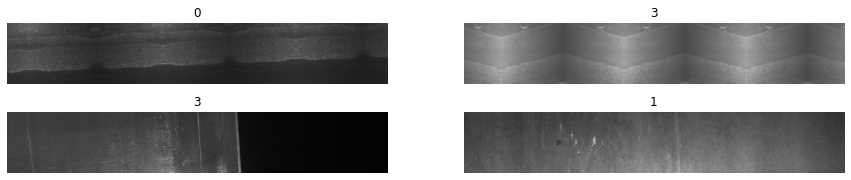

In [ ]:
dls.train.show_batch(figsize=(15, 3))

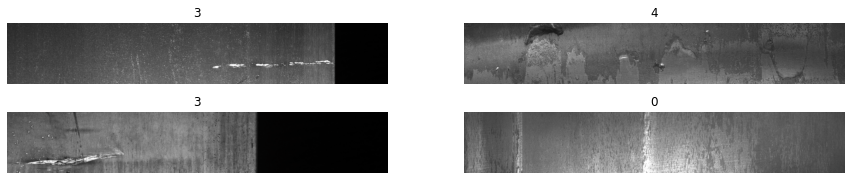

In [ ]:
dls.valid.show_batch(figsize=(15, 3))

In [ ]:
x, y = dls.train.one_batch()
x.shape, y.shape

((4, 3, 256, 1600), (4, 5))

## Segmentation

The `get_segmentation_dls` will load from the folder all the images while the `get_segmentation_dls_from_df` loads the images from a custom `DataFrame` to train on a different subsample.

In [ ]:
# export
classes = [0, 1, 2, 3, 4]

def get_segmentation_dls(bs, size, with_btfms=True):
    """Dataloaders from `train_path` folder"""

    b_tfms = [Normalize.from_stats(*imagenet_stats)]

    if with_btfms:
        b_tfms += aug_transforms(
            size=size if size else (256, 1600),
            max_warp=0.,
            flip_vert=True,
            max_rotate=5.,
            max_lighting=0.1)

    def get_labels_from_img(p):
        return labels_dir/f'{p.stem}_P.png'

    dblock = DataBlock(
        blocks=(ImageBlock, MaskBlock(codes=classes)),
        get_items=get_image_files,
        get_y=get_labels_from_img,
        splitter=RandomSplitter(valid_pct=0.2, seed=42),
        batch_tfms=b_tfms)

    return dblock.dataloaders(train_path, bs=bs)

In [ ]:
# missing
bs = 4
szs = (128, 800)
dls = get_segmentation_dls(bs, szs)

In [ ]:
# export
def get_segmentation_dls_from_df(train_df, bs, size):
    """Dataloaders from `train` DataFrame"""
    def get_x(df):
        img_name = df["ImageId"]
        return train_path / str(img_name)

    def get_y(df):
        img_name = df["ImageId"].split(".")[0] + "_P.png"
        return labels_dir / img_name

    dblock = DataBlock(
        blocks=(ImageBlock, MaskBlock(codes=classes)),
        get_x=get_x,
        get_y=get_y,
        splitter=RandomSplitter(valid_pct=0.2, seed=42),
        batch_tfms=aug_transforms(size=size))

    return dblock.dataloaders(train_df, bs=bs)

In [ ]:
# missing
bs = 4
szs = (128, 800)
dls = get_segmentation_dls_from_df(train_multi, bs, szs)

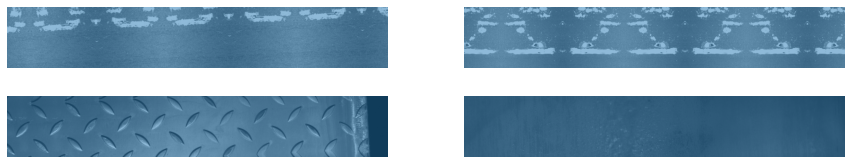

In [ ]:
dls.train.show_batch(figsize=(15, 3))

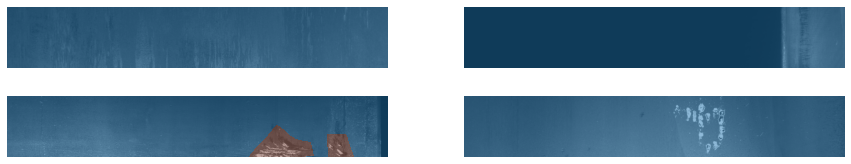

In [ ]:
dls.valid.show_batch(figsize=(15, 3))

In [ ]:
x, y = dls.train.one_batch()
x.shape, y.shape

((4, 3, 128, 800), (4, 128, 800))

The masks have a label for every pixel wich corresponds to a specific class inside the `classes` list.

In [ ]:
[torch.unique(y[i]) for i in range(bs)]

[TensorMask([0, 1]),
 TensorMask([0]),
 TensorMask([0, 3, 4]),
 TensorMask([0, 3])]

### From Kaggle kernel DataLoaders

In [ ]:
# export
import os
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset, sampler
from albumentations import (
    HorizontalFlip, ShiftScaleRotate, Resize, Compose, GaussNoise)
from albumentations.pytorch import ToTensor
import albumentations as alb

In [ ]:
# export
def get_transforms(phase, mean, std):
    list_transforms = []
    if phase == "train":
        list_transforms.extend(
            [
                HorizontalFlip(p=0.5),  # only horizontal flip as of now
            ]
        )
    list_transforms.extend(
        [
            alb.Normalize(mean=mean, std=std, p=1),
            ToTensor(),
        ]
    )
    list_trfms = Compose(list_transforms)
    return list_trfms

In [ ]:
# export
class SteelDataset(Dataset):

    def __init__(self, df, data_folder, mean, std, phase):
        self.df = df
        self.root = data_folder
        self.mean = mean
        self.std = std
        self.phase = phase
        self.transforms = get_transforms(phase, mean, std)
        self.fnames = self.df.index.tolist()

    def __getitem__(self, idx):
        image_id, mask = make_mask(idx, self.df)
        image_path = train_path / image_id
        #img = cv2.imread(str(image_path))
        img = np.array(Image.open(image_path))
        augmented = self.transforms(image=img, mask=mask)
        img = augmented['image']
        mask = augmented['mask']         # 1x256x1600x4
        mask = mask[0].permute(2, 0, 1)  # 4x256x1600
        return img, mask

    def __len__(self):
        return len(self.fnames)

In [ ]:
steel_ds = SteelDataset(train_pivot, path, 
                        imagenet_stats[0], imagenet_stats[1],
                       'train')

In [ ]:
assert len(steel_ds) == 6

In [ ]:
steel_ds[0][0].shape, steel_ds[0][1].shape

(torch.Size([3, 256, 1600]), torch.Size([4, 256, 1600]))

In [ ]:
# export
def kaggle_provider(
    phase,
    data_folder=path,
    mean=None,
    std=None,
    batch_size=8,
    num_workers=4,
):
    '''Returns dataloader for the model training'''
    df = train_pivot

    train_df, val_df = train_test_split(
        df, test_size=0.2, stratify=df["n"], random_state=69)
    
    df = train_df if phase == "train" else val_df
    image_dataset = SteelDataset(df, data_folder, mean, std, phase)
    
    dataloader = DataLoader(
        image_dataset,
        batch_size=batch_size,
        num_workers=num_workers,
        pin_memory=True,
        shuffle=True,
    )

    return dataloader

In [ ]:
# missing
steel_dls = kaggle_provider(
    phase='train', mean=imagenet_stats[0], std=imagenet_stats[1])

In [ ]:
# hide
from nbdev.export import notebook2script
notebook2script()

Converted 00_core.ipynb.
Converted 01_data.ipynb.
Converted 02_preprocessing.ipynb.
Converted 03_models.dls.ipynb.
Converted 04_model.metrics.ipynb.
Converted 05_models.unet.ipynb.
Converted 06_models.model.ipynb.
Converted index.ipynb.
